# MNIST CLASSIFICATION


In [1]:
# First of all we have to import all the essential libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense , Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical


In [2]:
# Now we have to load the data and at the same time we convert in into train and test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Now we have to prcoess the data
x_train = x_train / 255.0
x_test = x_test / 255.0


y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [4]:
# Now we have to build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

C:\Users\Home\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# Now we compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Now we fit the model
model.fit(x_train, y_train_cat, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8603 - loss: 0.4752 - val_accuracy: 0.9611 - val_loss: 0.1351
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9660 - loss: 0.1168 - val_accuracy: 0.9693 - val_loss: 0.1017
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9761 - loss: 0.0770 - val_accuracy: 0.9713 - val_loss: 0.0984
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9837 - loss: 0.0528 - val_accuracy: 0.9692 - val_loss: 0.1092
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9873 - loss: 0.0436 - val_accuracy: 0.9699 - val_loss: 0.1013
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9895 - loss: 0.0331 - val_accuracy: 0.9734 - val_loss: 0.1032
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9916 - loss: 0.0257 - val_accuracy: 0.9750 - val_loss: 0.1064
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9926 - loss: 0

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9724 - loss: 0.1156
Test Accuracy: 0.98


Training set shape: (60000, 28, 28)
Training labels shape: (60000,)


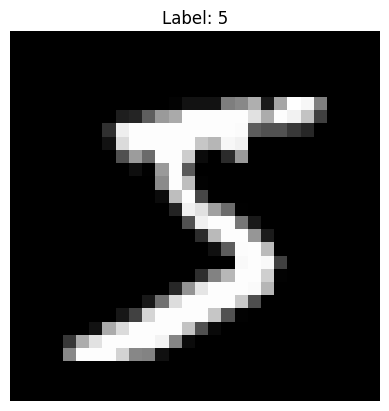

In [8]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print shape of dataset
print("Training set shape:", x_train.shape)
print("Training labels shape:", y_train.shape)

# Show first image and its label
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


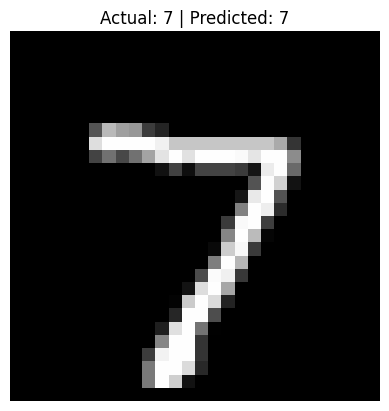

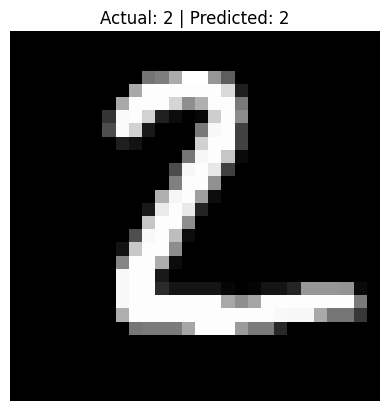

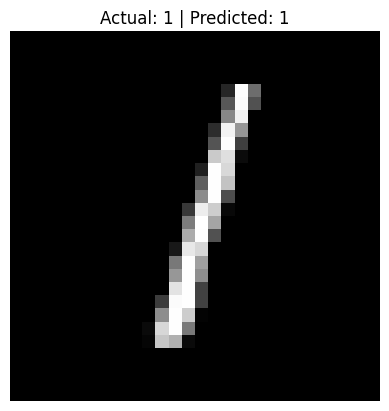

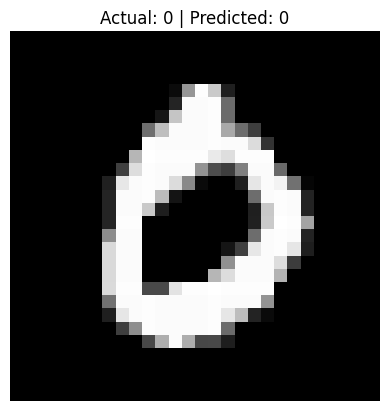

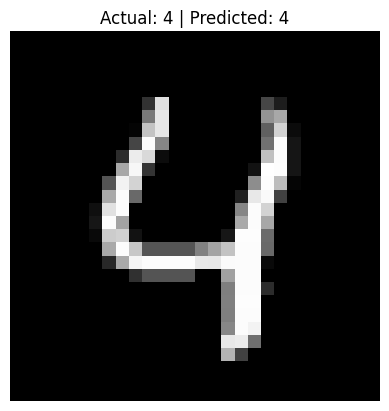

In [10]:
# Predict on test data
import numpy as np
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Visualize 5 predictions
for i in range(5):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Actual: {y_test[i]} | Predicted: {y_pred_classes[i]}")
    plt.axis('off')
    plt.show()

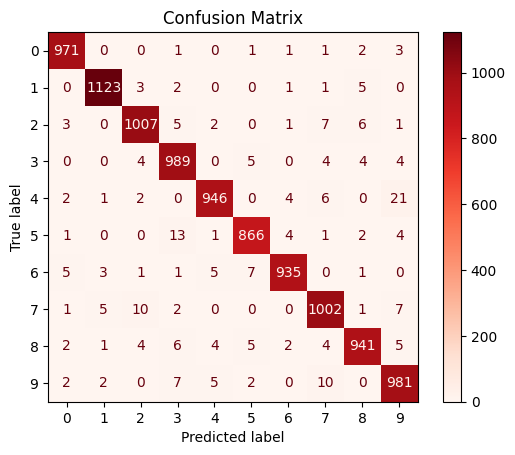

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.title('Confusion Matrix')
plt.show()
